<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Estimaci%C3%B3n_de_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Solució analítica

Para poder estimar el número Pi consideremos la siguiente gráfica:

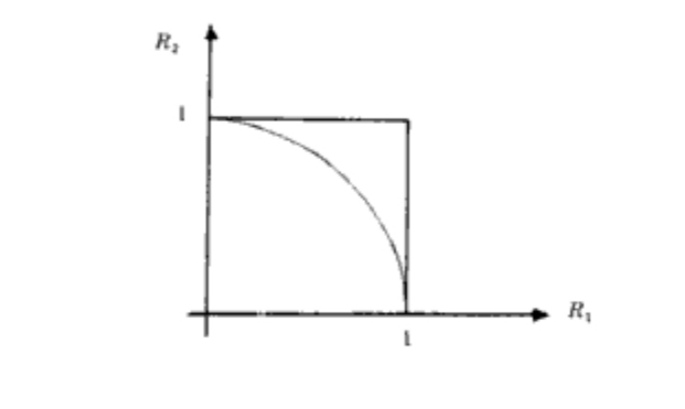

Si consideramos sus áreas es claro que el área del cuadrado es superior a la de sección de circulo.
$A_{cuadrado} = 1$ y $A_{sección} = π/4$ \
Considerando un punto que pertenezca a la sección del circulo. La probabilidad de que un punto pretenezca a esa sección es:
$$ \frac{A_{sección}}{A_{cuadrado}} = \frac{π/4}{1} = \frac{π}{4} $$.
\


Ahora consideremos el hecho de lanzar dardos a esa área, si se lanzarán $N$ dardo y consideraramos solamente los que cayeran dentro de la sección, $x$, entonces aplicando\
$$ Lim_{n-> ∞} \frac{x}{N} = \frac{π}{4}$$
$$ \frac{π}{4} = \frac{x}{N}$$
o bien
$$ π^{~} = 4 \frac{x}{N} $$
\
Por lo tanto así podriamos estimar el valor de π

El algoritmo consiste en:
1. Generar $u_{1}$, $u_{2}$ con distribución $U(0,1)$
2. Hacer un bucle de $N$ veces
3. Si $u_{1} <= (1-u_{2})^{0.5}$ hacer
   x = x+1
4. Salir x
5. Imprimir 4 x $\frac{x}{N}$


In [40]:
import numpy as np
import matplotlib.pyplot as plt #se importan la librerias a usar
import random as rd

In [41]:
def exito():  #definimos una función que nos devuleve 1 si hay exito
  valor=0     #osea si un dardo cae dentro del circulo
  u1=rd.uniform(0,1)
  u2=rd.uniform(0,1)
  if u1<=(1-u2**2)**(1/2):
    valor=1

  return valor

In [42]:
def experimento(N):  #función para repetir la tirada de dardos, hacerlo N veces
  lista_de_probabilidad=[]
  contador =0
  for i in range (N):
    contador +=exito() #llamamos nuestra función de exito
    lista_de_probabilidad.append(4*(contador/(i+1)))  #factor cuatro ya que sin el calculariamos pi/4
  return lista_de_probabilidad #regresamos una lista que contine los valores cada vez mas proximos a pi

In [43]:
Lista = experimento(10000) #llamamos la función experimento

In [44]:
print("Valor de la Pi aproximado: ",Lista[-1]) #imprimimos el valor que se aproxima a pi

Valor de la Pi aproximado:  3.158


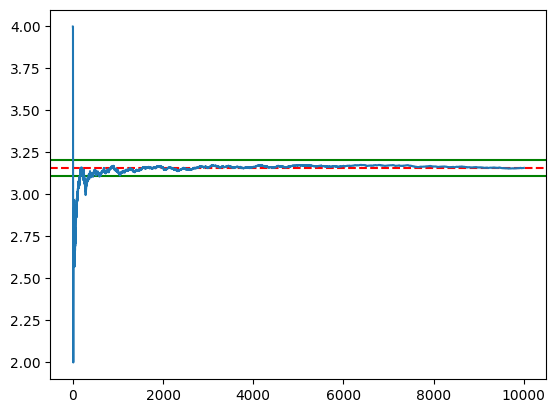

In [45]:
media=np.mean(Lista)   # se calcula la media y la desviación estandar de nuestra lista de probabilidades
desviacion=np.std(Lista)
#imprimir una recta que pase por la media (aproximada al valor de pi)
plt.axhline(media,color='r',linestyle='--')
plt.axhline((desviacion+media),color='g')    #se imprime la lista así como su media y un intervalo que lo contiene
plt.axhline((-desviacion+media),color='g')
plt.plot(Lista)
plt.show()

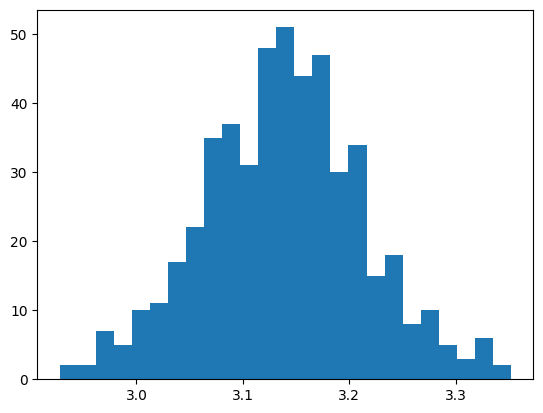

In [57]:
#Se ve que una muestra de tamano N=500 da un resultado aceptable

def simulacion(M):
    r=[]
    for i in range (M):
        R=experimento(500)
        r.append(R[-1])
    return r

t=simulacion(500)
plt.hist(t, bins=25)
plt.show()